In [1]:
# sigmoid curve fitting is from the https://gist.github.com/andrewgiessel/5684769
# good discussion here:  http://stackoverflow.com/questions/4308168/sigmoidal-regression-with-scipy-numpy-python-etc

## Import dependecies and define fuctions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.optimize import fsolve
from sklearn.metrics import r2_score

In [3]:
# Define the sigmoid function
# define a : maximum value, b: minimum, c:logistic growth rate or steepness, d: x_mid point 
def sigmoid(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b



In [4]:
def fit_sigmoid(x, y):
    # nonlinear least squares curve fitting with sigmoid fuction
    # bounds are the Lower and upper bounds on parameters. Important to avoid the covariance error
    
    (a_, b_, c_, d_), _ = opt.curve_fit(sigmoid, x, y, bounds=([0, 0, -5, -0.7], [20, 100., 5, 0.7]))

    #print a, b, c, d values
    print ("a_: " + str(a_),  "  b_(y_min): " + str(b_), "  c_(steepness): " + str(c_) ," d_(x0_mid): " + str(d_))

    # define and print the y_max, y_min, y_90, and y_10 values
    y_max = a_+ b_
    y_90 = a_*0.9+b_
    y_10 = a_*0.1+b_
    y_min = b_
    print("y_max : "+ str(y_max), "  y_90: " + str(y_90), "  y_10: " + str(y_10), "  y_min: " + str(b_))

    # fitting with sigmoid fuction
    y_fit = sigmoid(x, a_, b_, c_, d_)

    print('R^2: ', r2_score(y_fit, y))

    # define sigmiod 90, 10% fuction.
    def fp(p) :
        f1 = sigmoid(p, a_, b_, c_, d_) - y_90
        return f1

    def fq(q) :
        f2 = sigmoid(q, a_, b_, c_, d_) - y_10
        return f2
    
    #Solving the equation (p=90%, q= 10%)
    p_sol = fsolve(fp,0)
    q_sol = fsolve(fq,0)
    x_gab = q_sol-p_sol

    print("x_90", str(p_sol),"x_10: ", str(q_sol), "x_gap: ", str(x_gab))

    # plot with 10- 90% window
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y, 'ro')
    ax.plot(x, y_fit, 'b-')
    plt.axvline(x=d_, color='k', linestyle='--')
    plt.axvline(x=p_sol, color='g', linestyle='--')
    plt.axvline(x=q_sol, color='g', linestyle='--')
    plt.xlabel("Distance (nm)", fontsize=14)
    plt.ylabel('Concentration (%)', fontsize=14)
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    plt.xlim([-2.4, 2.4])

    return

## Import data and assign the x, y values 

In [5]:
# import csv data
df= pd.read_csv('Re_700_16h.csv') 

In [6]:
df.shape

(32, 9)

In [7]:
df.describe()

,distance,Ni,Ni_Err,Al,Al_Err,Cr,Cr_Err,Re,Re_Err
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,-0.000004,77.594049,0.075002,11.939183,0.058125,8.479589,0.047870,1.987179,0.024056
std,1.876166,2.179028,0.016993,5.434190,0.022627,2.687869,0.003102,0.577160,0.001649
min,-3.100005,74.979281,0.055348,5.614043,0.032562,5.292110,0.044057,1.305931,0.022380
25%,-1.550005,75.351339,0.059575,5.939856,0.035124,5.557966,0.045649,1.389800,0.023027
50%,-0.000004,77.693172,0.070990,11.953361,0.055280,8.420207,0.047249,1.933260,0.023581
75%,1.549996,79.868511,0.088158,17.772107,0.078170,11.436596,0.048796,2.643104,0.024084
max,3.099996,80.142501,0.109176,18.230512,0.097202,11.604105,0.056924,2.740788,0.029603


## Obtain Ni, Al, Cr, Re values using the for-loop 


 Element Ni
a_: 4.772484969784789   b_(y_min): 75.18365805518724   c_(steepness): -3.209334279576969  d_(x0_mid): 0.032380709979685084
y_max : 79.95614302497202   y_90: 79.47889452799355   y_10: 75.66090655216571   y_min: 75.18365805518724
R^2:  0.9967196487008608
x_90 [-0.65225491] x_10:  [0.71701633] x_gap:  [1.36927125]

 Element Al
a_: 12.308403751696897   b_(y_min): 5.771930131411503   c_(steepness): 2.5490544718096237  d_(x0_mid): -0.006794441839340975
y_max : 18.080333883108402   y_90: 16.84949350793871   y_10: 7.002770506581193   y_min: 5.771930131411503
R^2:  0.9994882767460281
x_90 [0.85518187] x_10:  [-0.86877076] x_gap:  [-1.72395263]

 Element Cr
a_: 6.225130157260686   b_(y_min): 5.37766929656698   c_(steepness): -2.2462615846744107  d_(x0_mid): -0.01096501745879448
y_max : 11.602799453827666   y_90: 10.980286438101597   y_10: 6.000182312293049   y_min: 5.37766929656698
R^2:  0.9996436106696982
x_90 [-0.98913452] x_10:  [0.96720449] x_gap:  [1.95633901]

 Element Re
a_: 

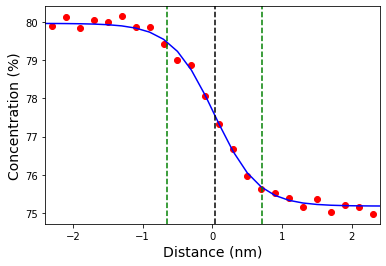

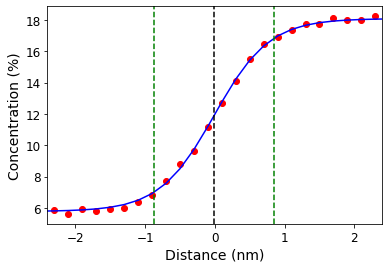

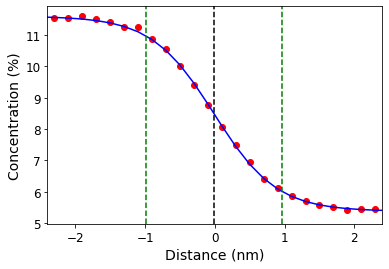

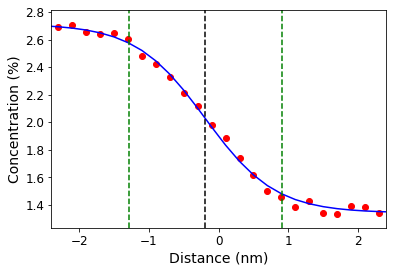

In [8]:
# maximun, Minimum, 90%, 10%, x-widthe using for-loop 
for i in ['Ni', 'Al', 'Cr', 'Re']:
    # assigne x and y values
    x = df['distance'].to_numpy()
    y = df[i].to_numpy()
    print("\n Element", i)
    fit_sigmoid(x, y)




 Re_700_025h.csv

 Element Ni
a_: 5.354504934873606   b_(y_min): 73.60453006440639   c_(steepness): -2.4002948808991973  d_(x0_mid): -0.5271445278945579
y_max : 78.95903499928   y_90: 78.42358450579263   y_10: 74.13998055789375   y_min: 73.60453006440639
R^2:  0.9960182390935807
x_90 [-1.4425423] x_10:  [0.38825324] x_gap:  [1.83079554]

 Element Al
a_: 9.862238896274961   b_(y_min): 9.31398101097037   c_(steepness): 2.3206164416719295  d_(x0_mid): -0.5638134359151605
y_max : 19.176219907245333   y_90: 18.189996017617837   y_10: 10.300204900597866   y_min: 9.31398101097037
R^2:  0.9978534896032552
x_90 [0.38301454] x_10:  [-1.51064142] x_gap:  [-1.89365596]

 Element Cr
a_: 3.8148742898927446   b_(y_min): 5.71285033016192   c_(steepness): -2.283046647824038  d_(x0_mid): -0.6624968114775747
y_max : 9.527724620054665   y_90: 9.14623719106539   y_10: 6.094337759151194   y_min: 5.71285033016192
R^2:  0.9938164537040592
x_90 [-1.62490578] x_10:  [0.29991216] x_gap:  [1.92481794]

 Elemen

<ipython-input-4-76687dc176dd>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(6, 4))
<ipython-input-4-76687dc176dd>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(6, 4))
<ipython-input-4-76687dc176dd>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warni


 Element Cr
a_: 6.26859114588284   b_(y_min): 5.401659084446805   c_(steepness): -2.0618326722224083  d_(x0_mid): -0.0555542698689493
y_max : 11.670250230329644   y_90: 11.043391115741361   y_10: 6.028518199035089   y_min: 5.401659084446805
R^2:  0.999864491563829
x_90 [-1.12122008] x_10:  [1.01011154] x_gap:  [2.13133161]

 Element Re
a_: 1.5383755192801374   b_(y_min): 1.218944939418009   c_(steepness): -1.9370683596863478  d_(x0_mid): -0.18295074040243642
y_max : 2.757320458698146   y_90: 2.6034829067701324   y_10: 1.3727824913460227   y_min: 1.218944939418009
R^2:  0.9993237374974114
x_90 [-1.31725484] x_10:  [0.95135336] x_gap:  [2.26860819]



 Re_700_1024h.csv

 Element Ni
a_: 4.4292011818812025   b_(y_min): 75.70401798749101   c_(steepness): -4.572971864323347  d_(x0_mid): -0.034716147358239746
y_max : 80.13321916937221   y_90: 79.6902990511841   y_10: 76.14693810567914   y_min: 75.70401798749101
R^2:  0.9950829562032045
x_90 [-0.51519682] x_10:  [0.44576452] x_gap:  [0.960961

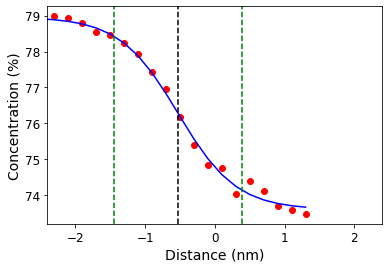

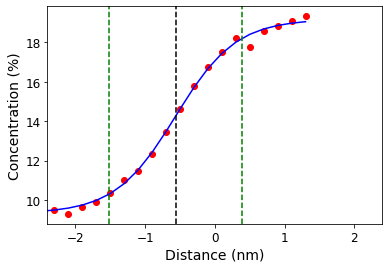

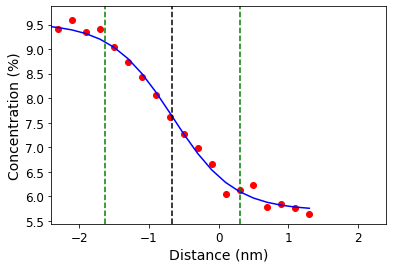

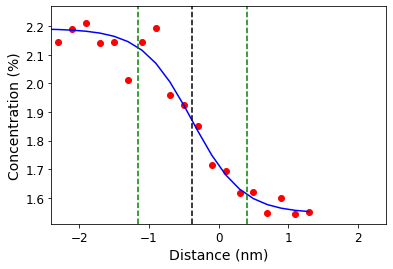

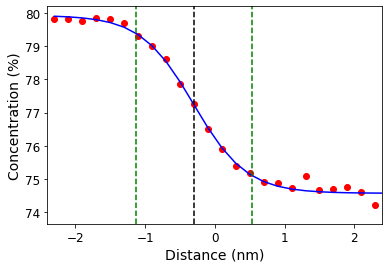

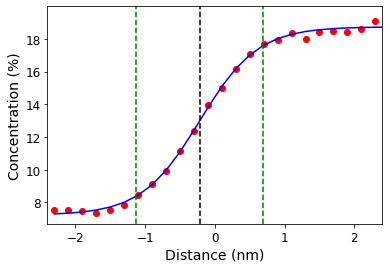

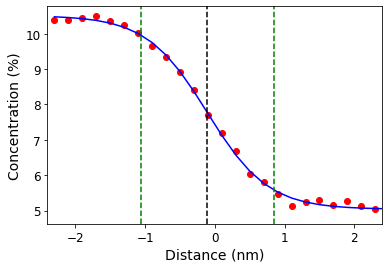

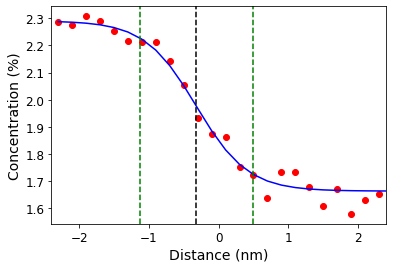

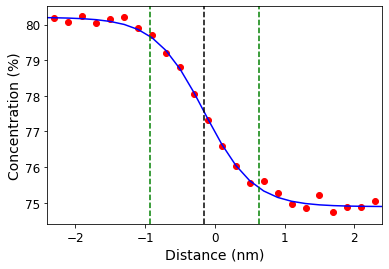

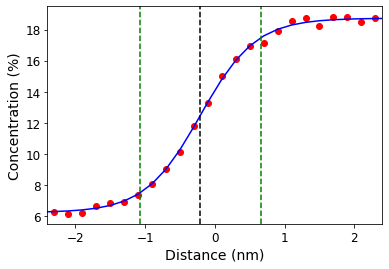

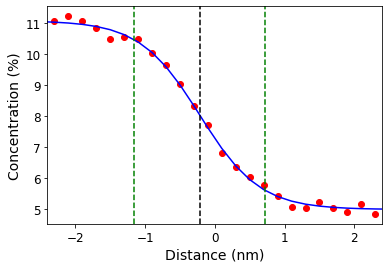

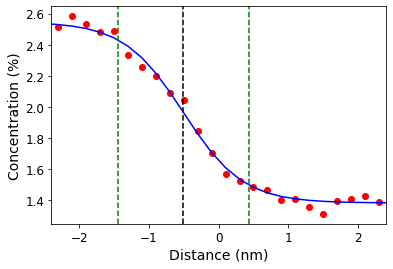

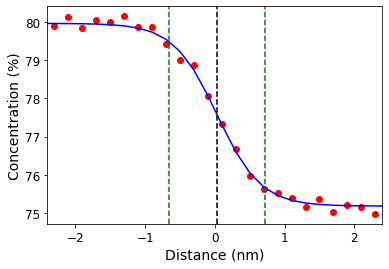

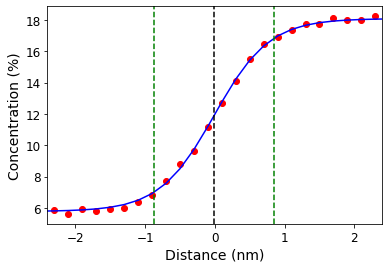

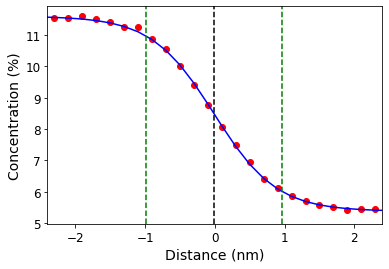

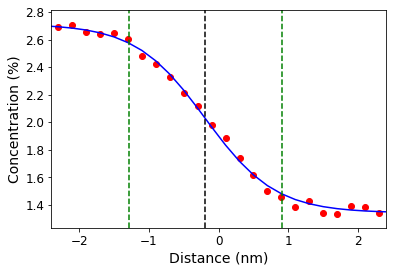

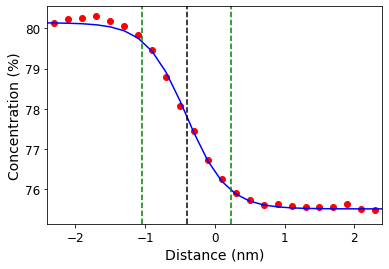

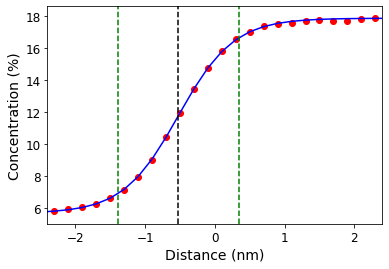

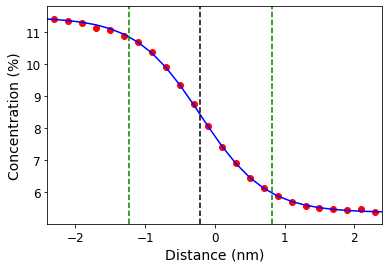

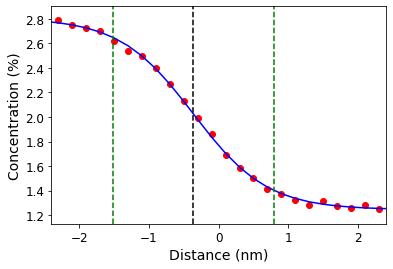

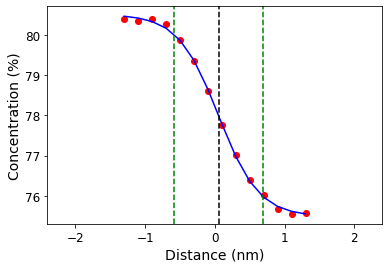

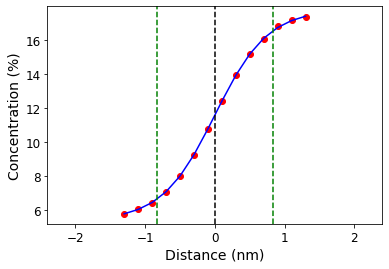

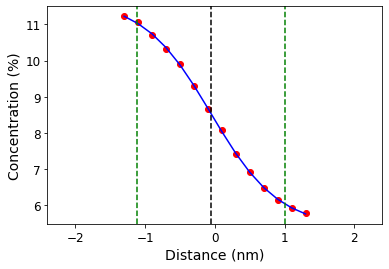

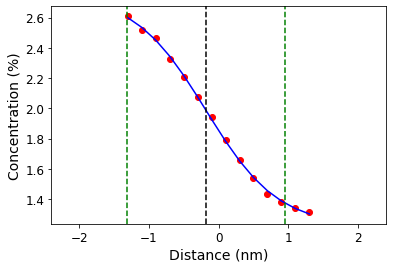

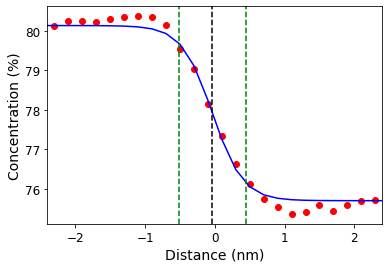

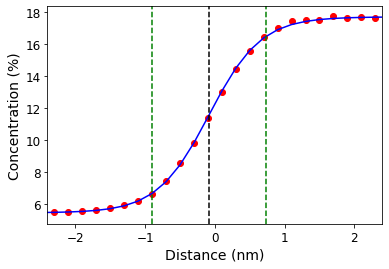

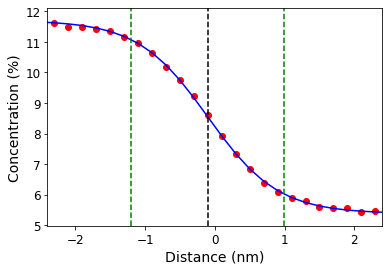

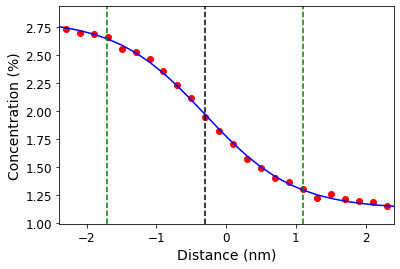

In [9]:
# interfacial width for all times we've experinced. 

times = ['Re_700_025h.csv', 'Re_700_1h.csv', 'Re_700_4h.csv', 'Re_700_16h.csv', 'Re_700_64h.csv', 'Re_700_256h.csv', 'Re_700_1024h.csv']

for i in times:
    # import csv data
    df= pd.read_csv(i)
    print ('\n\n\n', i)
    # maximun, Minimum, 90%, 10%, x-widthe using for-loop 
    for j in ['Ni', 'Al', 'Cr', 'Re']:
        # assigne x and y values
        x = df['distance'].to_numpy()
        y = df[j].to_numpy()
        print("\n Element", j)
        fit_sigmoid(x, y)
    